In [1]:
# Packages
using JuMP
using HiGHS
using CSV
using DataFrames
using Plots
using StatsPlots

In [2]:
# include the helper functions
include("functions-to-import-data.jl");
include("functions-to-export-data.jl");
include("functions-to-plot-results.jl");

In [3]:
# include the file with the functions for the stochastic GEP model
include("Stochastic-GEP-multi-stage.jl");

In [4]:
# Folders names
input_folder  = joinpath(@__DIR__, "inputs/multi-stage");
output_folder = joinpath(@__DIR__, "outputs/multi-stage");

In [5]:
# read the data
sets, params = read_multi_stage_data(input_folder);

In [6]:
model = create_and_solve_model(sets, params)

Running HiGHS 1.10.0 (git hash: fd8665394e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 1440 rows; 1456 cols; 4356 nonzeros; 16 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e-01, 4e+02]
  Cost   [1e-02, 2e+04]
  Bound  [8e+02, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
1296 rows, 1312 cols, 4068 nonzeros  0s
1296 rows, 1312 cols, 4068 nonzeros  0s

Solving MIP model with:
   1296 rows
   1312 cols (0 binary, 16 integer, 0 implied int., 1296 continuous)
   4068 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol       

A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 1456
├ num_constraints: 3200
│ ├ AffExpr in MOI.EqualTo{Float64}: 288
│ ├ AffExpr in MOI.LessThan{Float64}: 1152
│ ├ VariableRef in MOI.GreaterThan{Float64}: 1456
│ ├ VariableRef in MOI.LessThan{Float64}: 288
│ └ VariableRef in MOI.Integer: 16
└ Names registered in the model
  └ :c_balance, :c_max_prod, :e_accumulated_investment, :v_ens, :v_investment, :v_production

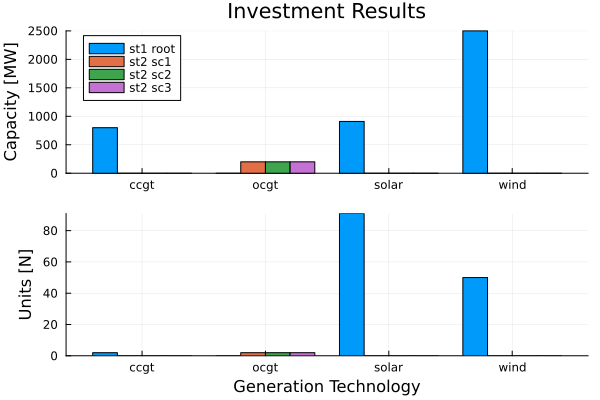

In [7]:
#plotly()
plot_multi_stage_investment(model, params)

In [8]:
save_multi_stage_results_to_csv(output_folder, model)